# Multiple Linear Regression

**Problem Statement:**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

**Business Goal:**

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

We have `730` datapoints and `16` columns in the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


All the columns seem to have the correct datatypes.

In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We have no missing values

In [6]:
col = df.columns.to_list()
col

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [7]:
for c in col[2:9]:
    print(f"{c} has values {list(df[c].unique())}")

season has values [1, 2, 3, 4]
yr has values [0, 1]
mnth has values [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
holiday has values [0, 1]
weekday has values [6, 0, 1, 2, 3, 4, 5]
workingday has values [0, 1]
weathersit has values [2, 1, 3]


The columns `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit` have few distinct values.

In [8]:
df[col[9:]].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


The columns `temp`, `atemp`, `hum`, `windspeed` are real numbers whereas `casual`, `registered`, `cnt` are integers.

In [9]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


The columns `instant` and `dteday` were redundant and hence they were dropped. We also dropped `causal` and `registered` as we only want the total demand and not the category.

One more anomaly is that in some rows both `holiday` and `workingday` are 0. It is absurd for a day to not be holiday and not be a working day simultaneously so we drop such rows.

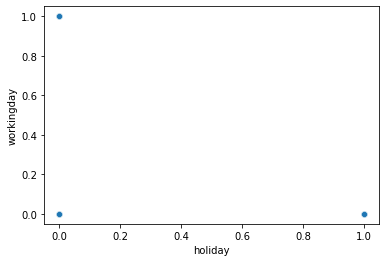

In [10]:
sns.scatterplot(x = 'holiday', y = 'workingday', data = df)
plt.show()

In [11]:
df = df.loc[(df['holiday'] != 0) | (df['workingday'] != 0)]
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510


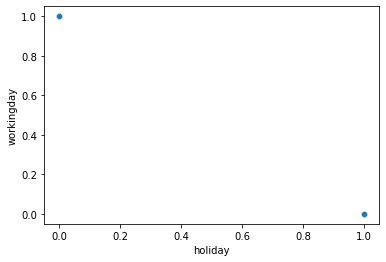

In [12]:
sns.scatterplot(x = 'holiday', y = 'workingday', data = df)
plt.show()

In [13]:
df.shape

(520, 12)

We removed `210` such rows! Now `holiday` and `workingday` convey the same information in the dataset so we can drop one of them. We will drop `workingday`.

In [14]:
df.drop(['workingday'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,2,8.057402,10.44195,49.8696,11.304642,1510


In [15]:
df.duplicated().sum()

0

We don't have any duplicate values in the data.

In [16]:
col = df.columns.to_list()
col

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

In [17]:
cat_cols = col[0:6]
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']

In [18]:
desc_cols = col[6:]
desc_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

## Data Visualization

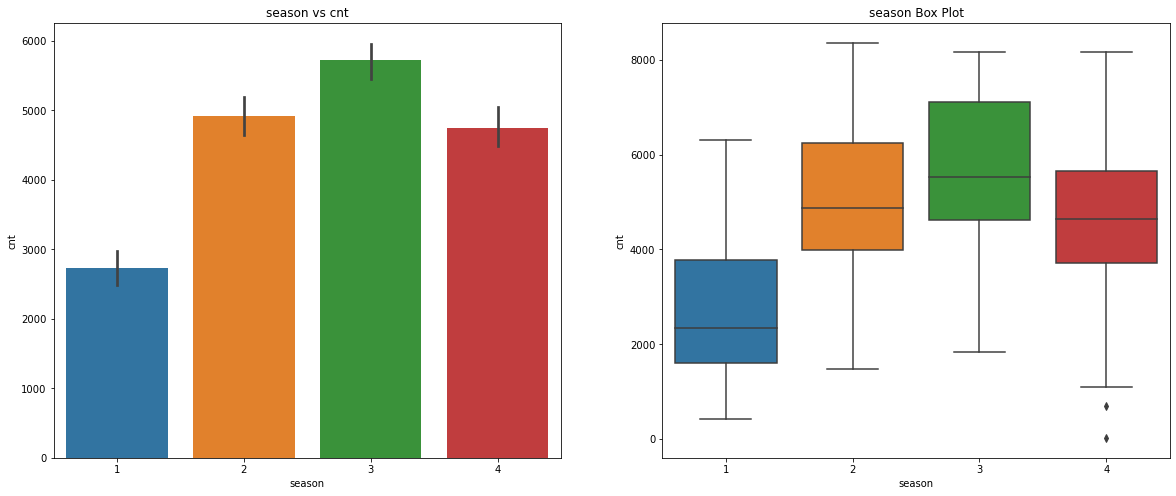

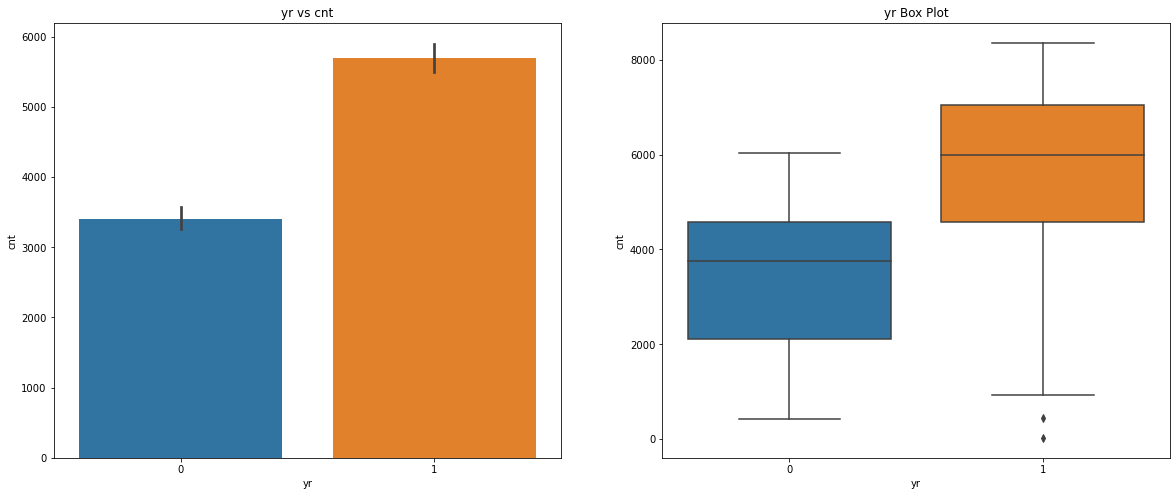

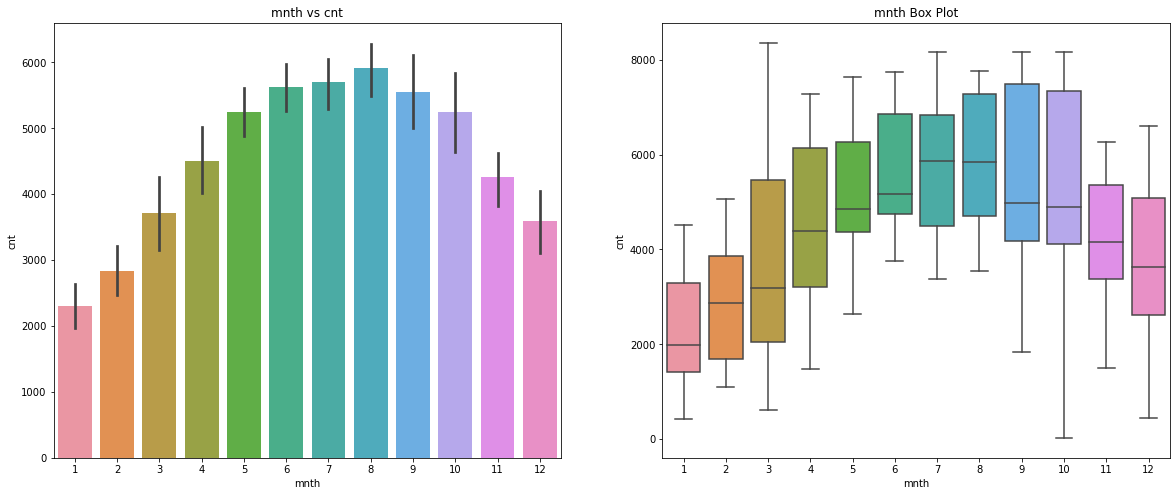

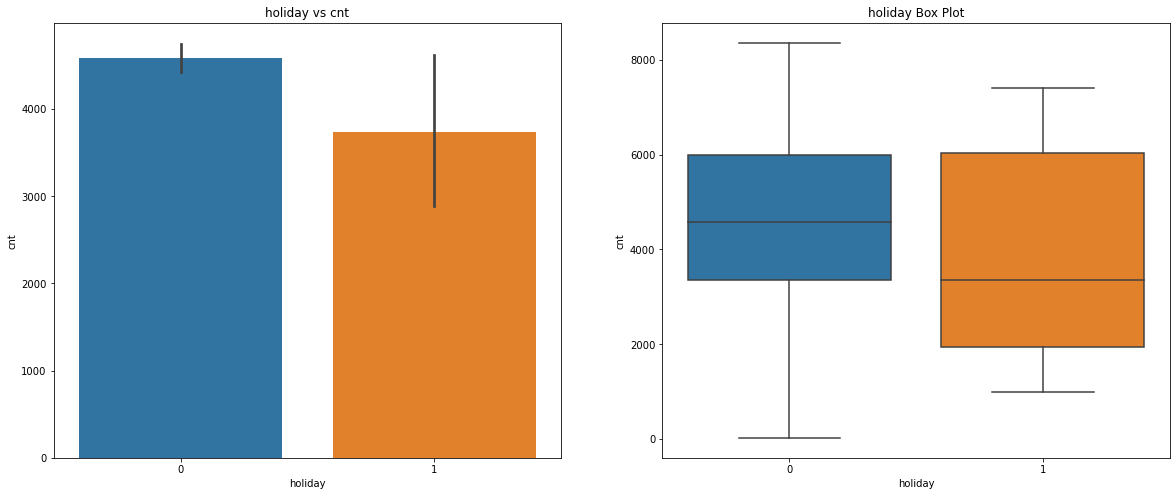

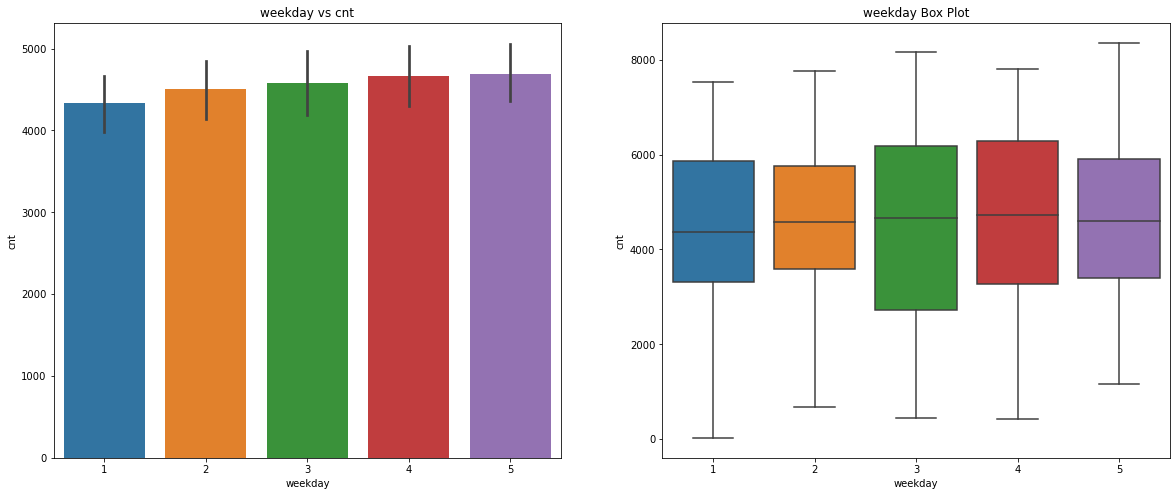

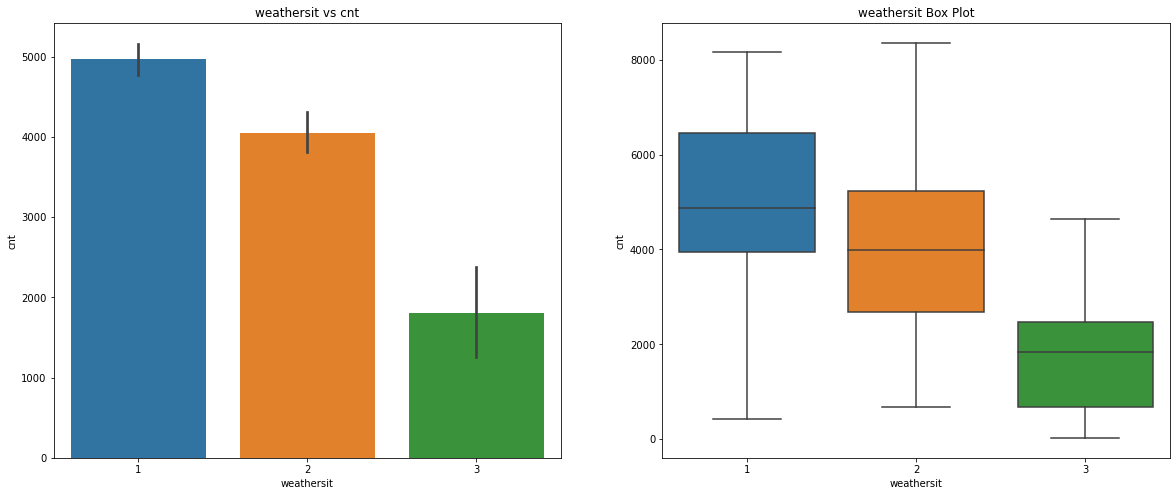

In [19]:
for c in cat_cols:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    sns.barplot(x=c, y='cnt', data=df, estimator='mean')
    plt.title(f'{c} vs cnt')

    plt.subplot(1,2,2)
    plt.title(f'{c} Box Plot')
    sns.boxplot(x = df[c], y=df['cnt'])

    plt.show()

**Few Insights:**

> Demand has increased the following year

> There is more demand on holidays

> There is very less demand during weather 3

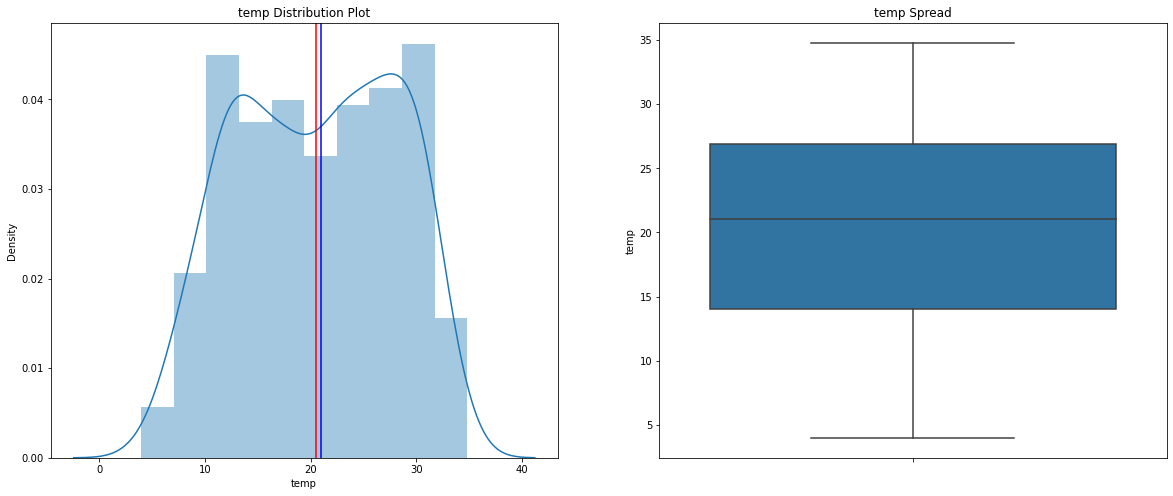

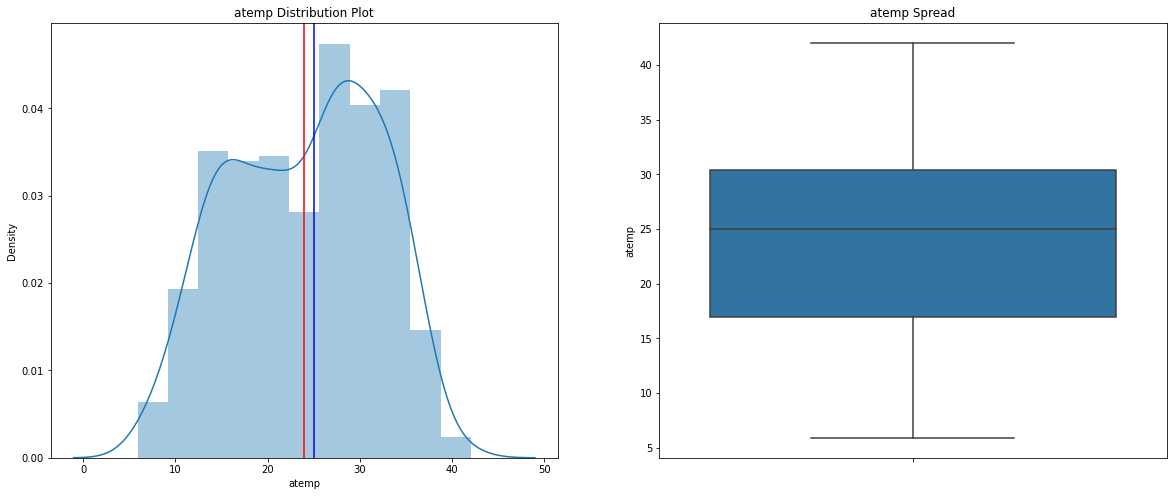

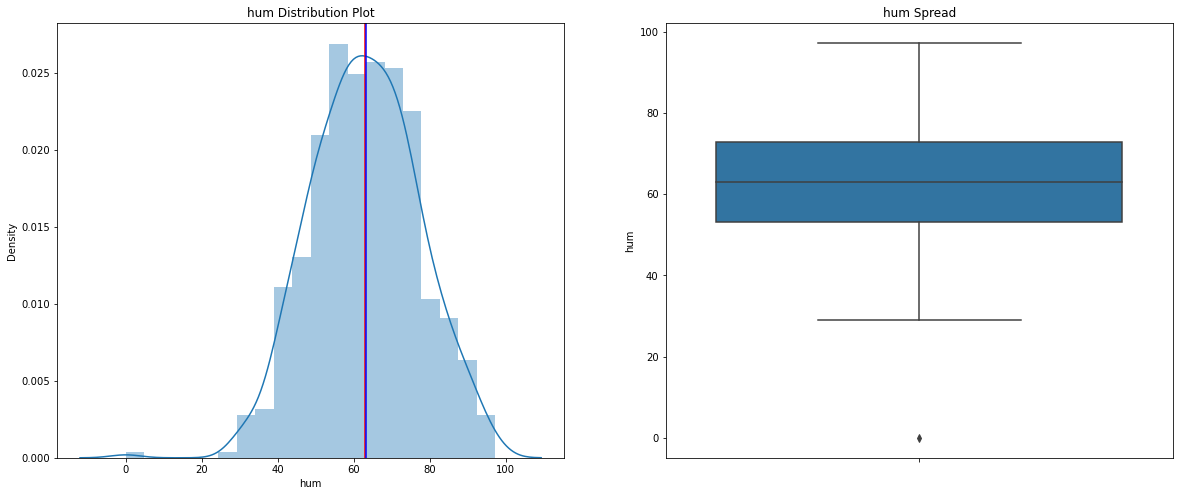

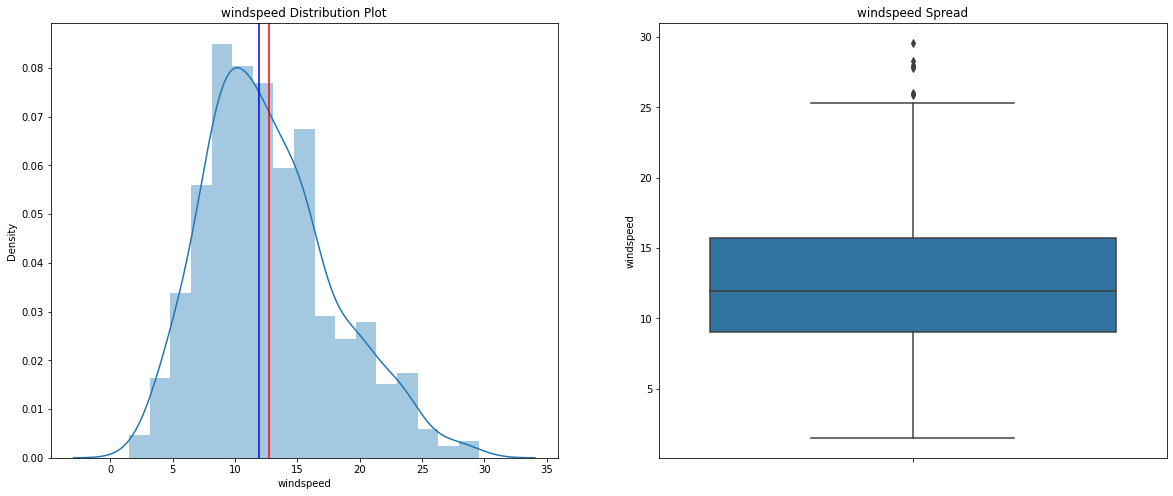

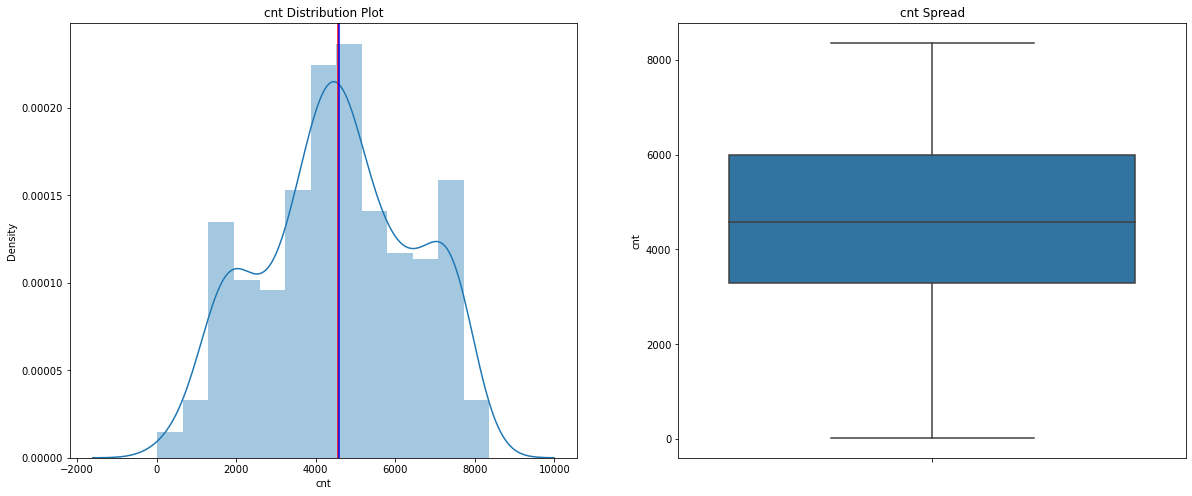

In [20]:
for c in desc_cols:
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(f'{c} Distribution Plot')
    sns.distplot(df[c])
    plt.axvline(df[c].mean(), color="r")
    plt.axvline(df[c].median(), color="b")

    plt.subplot(1,2,2)
    plt.title(f'{c} Spread')
    sns.boxplot(y=df[c])

    plt.show()

**Few Insights:**

> `temp` has bimodal distribution

> `windspeed` is right-skewed

> Majority of the columns have mean and median equal

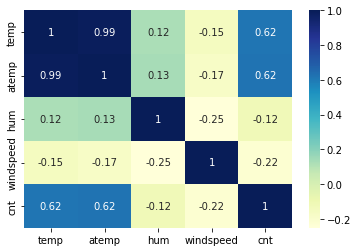

In [21]:
sns.heatmap(df[desc_cols].corr(), cmap = 'YlGnBu', annot = True)
plt.show()

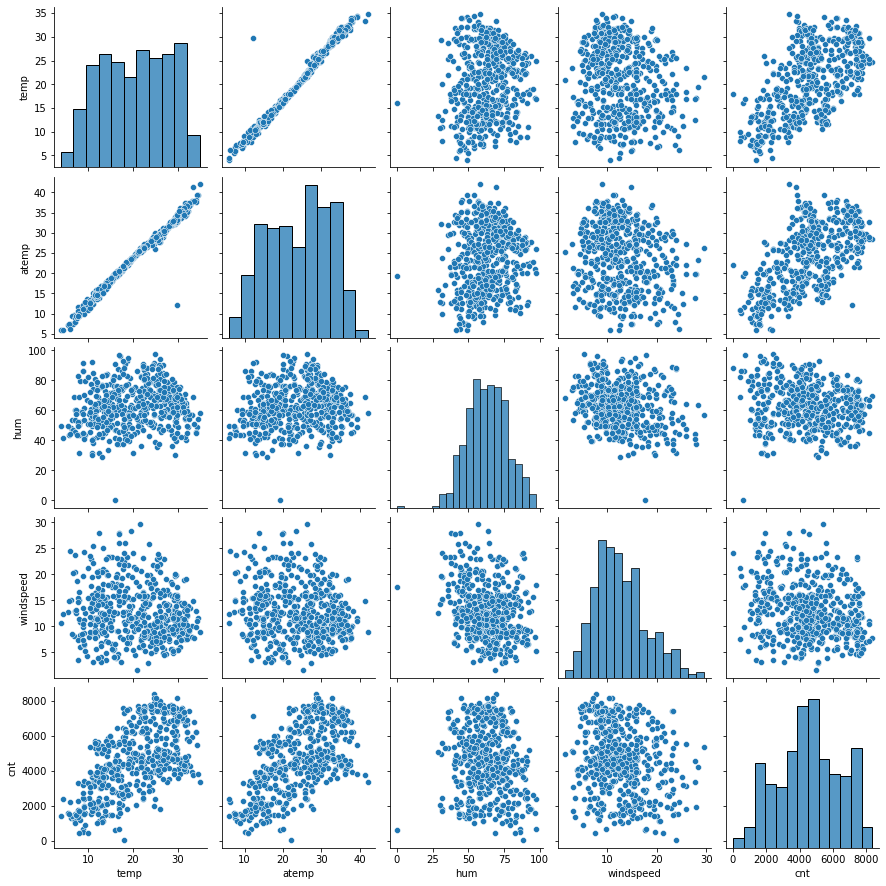

In [22]:
sns.pairplot(df[desc_cols])
plt.show()

`temp` and `atemp` are highly correlated so we drop one of them to avoid multi-collinearity

In [23]:
df.drop(['atemp'], axis = 1, inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
2,1,0,1,0,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,9.305237,43.6957,12.522300,1600
5,1,0,1,0,4,1,8.378268,51.8261,6.000868,1606
6,1,0,1,0,5,2,8.057402,49.8696,11.304642,1510


In [24]:
desc_cols.remove('atemp')
desc_cols

['temp', 'hum', 'windspeed', 'cnt']

## Model Development

First we normalize the continuous features using `MinMax` Scaler. To use `MinMax` we must remove the outliers.

In [25]:
# Calculate the interquartile range (IQR) for each column
Q1 = df[desc_cols].quantile(0.25)
Q3 = df[desc_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Remove rows with outliers
df = df[~((df[desc_cols] < (Q1 - threshold * IQR)) | (df[desc_cols] > (Q3 + threshold * IQR))).any(axis=1)]

In [26]:
df.shape

(511, 10)

`9` rows were removed!

### Scaling the features

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[desc_cols] = scaler.fit_transform(df[desc_cols])

In [28]:
df[desc_cols].describe()

,temp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000
mean,0.538568,0.501958,0.460208,0.546078
std,0.243571,0.200812,0.204696,0.226556
min,0.000000,0.000000,0.000000,0.000000
25%,0.324183,0.362027,0.312937,0.394964
50%,0.555004,0.502442,0.430094,0.547122
75%,0.744766,0.644383,0.589174,0.721942
max,1.000000,1.000000,1.000000,1.000000


In [29]:
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
2,1,0,1,0,1,1,0.131798,0.215785,0.635105,0.159113
3,1,0,1,0,2,1,0.136640,0.440198,0.387681,0.184652
4,1,0,1,0,3,1,0.172538,0.215322,0.462471,0.189209
5,1,0,1,0,4,1,0.142430,0.334448,0.188840,0.189928
6,1,0,1,0,5,2,0.132009,0.305782,0.411379,0.178417


### One Hot Encoding

In [30]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
df.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,mnth_10,mnth_11,mnth_12,holiday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_2,weathersit_3
2,0.131798,0.215785,0.635105,0.159113,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.136640,0.440198,0.387681,0.184652,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.172538,0.215322,0.462471,0.189209,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0.142430,0.334448,0.188840,0.189928,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0.132009,0.305782,0.411379,0.178417,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [31]:
df.shape

(511, 26)

In [32]:
df.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

Now we define X and y for model training. Target variable (y) is `cnt` and rest of the column are input features.

In [33]:
y = df.pop('cnt')
y.head()

2    0.159113
3    0.184652
4    0.189209
5    0.189928
6    0.178417
Name: cnt, dtype: float64

In [34]:
X = df
X.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_10,mnth_11,mnth_12,holiday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_2,weathersit_3
2,0.131798,0.215785,0.635105,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.136640,0.440198,0.387681,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.172538,0.215322,0.462471,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0.142430,0.334448,0.188840,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0.132009,0.305782,0.411379,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### Train Test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [36]:
X_train.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_10,mnth_11,mnth_12,holiday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_2,weathersit_3
61,0.134420,0.041514,0.571698,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
86,0.222330,0.017837,0.533606,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
652,0.618258,0.611722,0.769280,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
116,0.695938,0.799146,0.814718,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
691,0.360803,0.408425,0.353173,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [37]:
X_train.shape

(408, 25)

In [38]:
X_test.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,mnth_10,mnth_11,mnth_12,holiday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_2,weathersit_3
69,0.291808,0.526835,0.591984,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
498,0.633793,0.731990,0.534978,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
408,0.166602,0.177656,0.407323,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0.576088,0.584249,0.498266,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
717,0.313085,0.491453,0.454577,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [39]:
X_test.shape

(103, 25)

In [40]:
y_train.head()

61     0.199400
86     0.240528
652    0.701799
116    0.461631
691    0.466187
Name: cnt, dtype: float64

In [41]:
y_train.shape

(408,)

In [42]:
y_test.head()

69     0.234412
498    0.338249
408    0.407674
318    0.500360
717    0.628897
Name: cnt, dtype: float64

In [43]:
y_test.shape

(103,)

### RFE

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= lr, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [46]:
X_train.loc[:, rfe.support_].columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_12', 'holiday_1', 'weekday_2', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [47]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 5),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 6),
 ('mnth_12', True, 1),
 ('holiday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 3),
 ('weekday_5', False, 4),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

We have the list of important features and now we build model using `statsmodels`

In [48]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_8,mnth_9,mnth_10,mnth_12,holiday_1,weekday_2,weathersit_2,weathersit_3
61,0.134420,0.041514,0.571698,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
86,0.222330,0.017837,0.533606,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
652,0.618258,0.611722,0.769280,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
116,0.695938,0.799146,0.814718,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
691,0.360803,0.408425,0.353173,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [51]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          4.16e-161
Time:                        10:47:00   Log-Likelihood:                 453.59
No. Observations:                 408   AIC:                            -865.2
Df Residuals:                     387   BIC:                            -780.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2147      0.023      9.390   

`mnth_2` has p-value of `0.342` which is higher than the significance value of `0.05`, hence we drop that column.

In [52]:
X_train_new = X_train_new.drop(['mnth_2'], axis = 1)

### Model 2

In [53]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     143.0
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          5.38e-162
Time:                        10:47:00   Log-Likelihood:                 453.11
No. Observations:                 408   AIC:                            -866.2
Df Residuals:                     388   BIC:                            -786.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2229      0.021     10.521   

`mnth_4` has p-value of `0.487` which is higher than the significance value of `0.05`, hence we drop that column.

In [54]:
X_train_new = X_train_new.drop(['mnth_4'], axis = 1)

### Model 3

In [55]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          5.48e-163
Time:                        10:47:00   Log-Likelihood:                 452.86
No. Observations:                 408   AIC:                            -867.7
Df Residuals:                     389   BIC:                            -791.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2239      0.021     10.606   

`mnth_6` has p-value of `0.611` which is higher than the significance value of `0.05`, hence we drop that column.

In [56]:
X_train_new = X_train_new.drop(['mnth_6'], axis = 1)

### Model 4

In [57]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     160.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          4.85e-164
Time:                        10:47:00   Log-Likelihood:                 452.72
No. Observations:                 408   AIC:                            -869.4
Df Residuals:                     390   BIC:                            -797.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2235      0.021     10.604   

`mnth_12` has p-value of `0.156` which is higher than the significance value of `0.05`, hence we drop that column.

In [58]:
X_train_new = X_train_new.drop(['mnth_12'], axis = 1)

### Model 5

In [59]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     169.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          9.96e-165
Time:                        10:47:00   Log-Likelihood:                 451.67
No. Observations:                 408   AIC:                            -869.3
Df Residuals:                     391   BIC:                            -801.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2270      0.021     10.830   

`mnth_3` has p-value of `0.094` which is higher than the significance value of `0.05`, hence we drop that column.

In [60]:
X_train_new = X_train_new.drop(['mnth_3'], axis = 1)

### Model 6

In [61]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     180.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          2.96e-165
Time:                        10:47:00   Log-Likelihood:                 450.20
No. Observations:                 408   AIC:                            -868.4
Df Residuals:                     392   BIC:                            -804.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2325      0.021     11.210   

`mnth_5` has p-value of `0.153` which is higher than the significance value of `0.05`, hence we drop that column.

In [62]:
X_train_new = X_train_new.drop(['mnth_5'], axis = 1)

### Model 7

In [63]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     192.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          5.79e-166
Time:                        10:47:00   Log-Likelihood:                 449.14
No. Observations:                 408   AIC:                            -868.3
Df Residuals:                     393   BIC:                            -808.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2278      0.021     11.108   

`weekday_2` has p-value of `0.333` which is higher than the significance value of `0.05`, hence we drop that column.

In [64]:
X_train_new = X_train_new.drop(['weekday_2'], axis = 1)

### Model 8

In [65]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          6.29e-167
Time:                        10:47:00   Log-Likelihood:                 448.65
No. Observations:                 408   AIC:                            -869.3
Df Residuals:                     394   BIC:                            -813.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2297      0.020     11.246   

All of the features have p-values lower than `0.05`. Now we check VIF.

In [66]:
checkVIF(X_train_new)

,Features,VIF
0,const,25.31
5,season_3,6.13
1,temp,3.81
4,season_2,2.79
6,season_4,2.25
2,hum,2.06
10,mnth_10,1.60
8,mnth_8,1.57
12,weathersit_2,1.57
13,weathersit_3,1.41


`season_3` has high VIF score hence we drop that column.

In [67]:
X_train_new = X_train_new.drop(['season_3'], axis = 1)

### Model 9

In [68]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          4.48e-165
Time:                        10:47:00   Log-Likelihood:                 441.40
No. Observations:                 408   AIC:                            -856.8
Df Residuals:                     395   BIC:                            -804.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2277      0.021     10.972   

In [69]:
checkVIF(X_train_new)

,Features,VIF
0,const,25.29
2,hum,2.00
5,season_4,1.78
11,weathersit_2,1.57
9,mnth_10,1.55
1,temp,1.51
7,mnth_8,1.39
12,weathersit_3,1.39
4,season_2,1.37
8,mnth_9,1.25


All scores are satisfactory

### Residual Analysis of Model

In [70]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

In [71]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          4.48e-165
Time:                        10:47:00   Log-Likelihood:                 441.40
No. Observations:                 408   AIC:                            -856.8
Df Residuals:                     395   BIC:                            -804.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2277      0.021     10.972      0.000       0.187       0.269
temp             0.5082      0.021     24.550      0.000       0.468       0.549
hum             -0.1492      0.029     -5.131      0.000      -0.206      -0.092
windspeed       -0.1111      0.022     -5.098      0.000      -0.154      -0.068
season_2         0.0885      0.011      7.908      0.000       0.066       0.110
season_4         0.1302      0.013     10.079      0.000       0.105       0.156
yr_1             0.2450      0.008     29.150      0.000       0.228       0.262
mnth_8           0.0685      0.017      4.092      0.000       0.036       0.101
mnth_9           0.1015      0.017      5.831      0.000       0.067       0.136
mnth_10          0.0620      0.018      3.421      0.001       0.026       0.098
holiday_1       -0.0867      0.021     -4.161      0.000      -0.128      -0.046
weathersit_2    -0.0453      0.011     -4.180      0.000      -0.067      -0.024
weathersit_3    -0.2534      0.030     -8.432      0.000      -0.312      -0.194
==============================================================================
Omnibus:                       62.008   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.861
Skew:                          -0.733   Prob(JB):                     1.59e-36
Kurtosis:                       5.747   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
resd = pd.DataFrame(zip(y_train, y_train_price),columns = ['Actual', 'Predicted'])
resd['Residuals'] = resd['Actual'] - resd['Predicted']
resd.head()

,Actual,Predicted,Residuals
0,0.199400,0.226314,-0.026913
1,0.240528,0.367211,-0.126684
2,0.701799,0.757069,-0.055270
3,0.461631,0.414756,0.046875
4,0.466187,0.686090,-0.219903


In [73]:
np.mean(resd['Residuals'])

-3.756526680134874e-16

The mean of residuals is very close to `0`

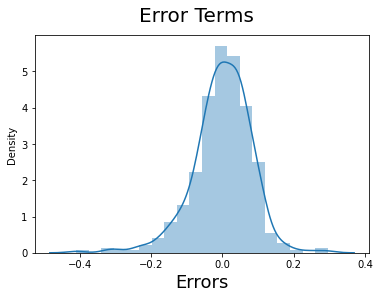

In [74]:
fig = plt.figure()
sns.distplot(resd['Residuals'], bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

The error terms are normally distributed which is a good sign.

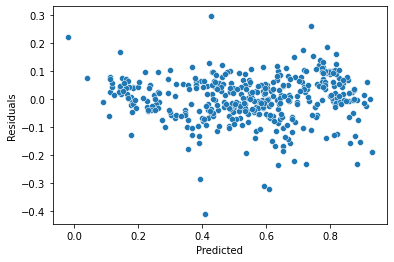

In [75]:
sns.scatterplot(x = 'Predicted', y = 'Residuals', data = resd)
plt.show()

There seems to be no pattern in the error terms.

## Predictions

In [76]:
X_train_new = X_train_new.drop('const',axis=1)
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [77]:
y_pred = lm.predict(X_test_new)

In [78]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_test, y_pred)

0.7979079578910016

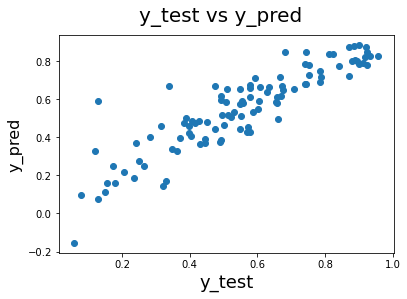

In [80]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          4.48e-165
Time:                        10:47:01   Log-Likelihood:                 441.40
No. Observations:                 408   AIC:                            -856.8
Df Residuals:                     395   BIC:                            -804.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2277      0.021     10.972      0.000       0.187       0.269
temp             0.5082      0.021     24.550      0.000       0.468       0.549
hum             -0.1492      0.029     -5.131      0.000      -0.206      -0.092
windspeed       -0.1111      0.022     -5.098      0.000      -0.154      -0.068
season_2         0.0885      0.011      7.908      0.000       0.066       0.110
season_4         0.1302      0.013     10.079      0.000       0.105       0.156
yr_1             0.2450      0.008     29.150      0.000       0.228       0.262
mnth_8           0.0685      0.017      4.092      0.000       0.036       0.101
mnth_9           0.1015      0.017      5.831      0.000       0.067       0.136
mnth_10          0.0620      0.018      3.421      0.001       0.026       0.098
holiday_1       -0.0867      0.021     -4.161      0.000      -0.128      -0.046
weathersit_2    -0.0453      0.011     -4.180      0.000      -0.067      -0.024
weathersit_3    -0.2534      0.030     -8.432      0.000      -0.312      -0.194
==============================================================================
Omnibus:                       62.008   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.861
Skew:                          -0.733   Prob(JB):                     1.59e-36
Kurtosis:                       5.747   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""